# **1. Install Dependencies**

In [1]:
! pip install shap pandas matplotlib scikit-learn nltk

import nltk
nltk.download('punkt')

import nltk


try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
!rm -rf *.json

!git clone https://github.com/mariamedeea/arheologie.git

!find arheologie/ -name "*.json" -exec cp {} ./ \;

!ls *.json


Cloning into 'arheologie'...
remote: Enumerating objects: 2632, done.
remote: Counting objects: 100% (2632/2632), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 2632 (delta 2561), reused 2603 (delta 2542), pack-reused 0 (from 0)
Receiving objects: 100% (2632/2632), 22.76 MiB | 6.55 MiB/s, done.
Resolving deltas: 100% (2561/2561), done.
Updating files: 100% (2605/2605), done.
germania.json  italia.json  Romania.json  spania.json  UK.json


# **2. File Paths**

In [4]:
import json
import pandas as pd

file_paths = {
    "Romania": "/content/Romania.json",
    "Germania": "/content/germania.json",
    "Italia": "/content/italia.json",
    "Spania": "/content/spania.json",
    "UK": "/content/UK.json"
}

data = []
for region, file_path in file_paths.items():
    with open(file_path, 'r', encoding='utf-8') as file:
        articles = json.load(file)
        for article in articles:
            data.append({
                "title": article.get("title"),
                "text": article.get("text"),
                "region": region,
                "category": article.get("category"),
                "url": article.get("url")
            })

df = pd.DataFrame(data)

print("Structura datasetului combinat:")
print(df.head())

df.to_csv("combined_articles.csv", index=False)


Structura datasetului combinat:
                                               title  \
0  Iluzia optică ce îţi testează inteligenţa | Gă...   
1  Crăciun „ecuatorial”! Record de căldură în Rom...   
2  Accident teribil în sectorul 6 din București. ...   
3  Marcel Ciolacu: Propuneri toxice privind auton...   
4  Ce au consumat fetele din Lupeni, înainte să s...   

                                                text   region category  \
0  Este miercuri, suntem la mijlocul săptămânii ș...  Romania    Stiri   
1  La fel ca și anul trecut, bucureștenii au avut...  Romania    Stiri   
2  Accident grav petrecut în București, în sector...  Romania    Stiri   
3  Prim-ministrul Marcel Ciolacu a transmis, prin...  Romania    Stiri   
4  Ies la iveală noi detalii în cazul tragediei d...  Romania    Stiri   

          url  
0  cancan.txt  
1  cancan.txt  
2  cancan.txt  
3  cancan.txt  
4  cancan.txt  


# 3. Cele mai **frecvente** cuvinte

In [8]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('romanian') +  ['și', 'sau', 'este', 'fi',"clic", "evalua", "dcnews", "urmariti", "ziar", "postare", "citiți", "urmăriți","marea","britanie","roman","român","româncă","germania","româniei","românesc","românia","români","românești","continuați","ziarul","italia","spania","spaniei"])


def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-ZăîâșțĂÎÂȘȚ ]', '', text)
    text = text.lower().strip()
    return text

def preprocess_text(text, stop_words):
    if not isinstance(text, str):
        return []
    text = clean_text(text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df['cleaned_text'] = df['text'].apply(lambda x: preprocess_text(x, stop_words))

def word_frequencies_by_region(df, region):
    region_text = df[df['region'] == region]['cleaned_text'].sum()
    if not isinstance(region_text, list):
        region_text = []
    word_freq = Counter(region_text)
    return word_freq.most_common(20)

germania_freq = word_frequencies_by_region(df, 'Germania')
romania_freq = word_frequencies_by_region(df, 'Romania')
spain_freq = word_frequencies_by_region(df, 'Spania')
uk_freq = word_frequencies_by_region(df, 'UK')
italy_freq = word_frequencies_by_region(df, 'Italia')

print("Cele mai frecvente cuvinte din Germania:", germania_freq)
print("Cele mai frecvente cuvinte din România:", romania_freq)
print("Cele mai frecvente cuvinte din Spania:", spain_freq)
print("Cele mai frecvente cuvinte din UK:", uk_freq)
print("Cele mai frecvente cuvinte din Italia:", italy_freq)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cele mai frecvente cuvinte din Germania: [('euro', 703), ('ani', 672), ('trebuie', 508), ('pensie', 475), ('citește', 400), ('timp', 379), ('potrivit', 371), ('putea', 325), ('mare', 308), ('când', 286), ('muncă', 285), ('lucru', 282), ('puțin', 282), ('există', 274), ('mari', 266), ('mulți', 261), ('trebui', 251), ('continuă', 250), ('aproximativ', 242), ('conform', 237)]
Cele mai frecvente cuvinte din România: [('ani', 3497), ('declarat', 2308), ('spus', 2299), ('potrivit', 2157), ('luni', 2088), ('când', 2045), ('acum', 1861), ('timp', 1843), ('trump', 1600), ('trebuie', 1496), ('mare', 1459), ('însă', 1402), ('făcut', 1314), ('asemenea', 1273), ('fiind', 1239), ('întrun', 1224), ('mari', 1181), ('ucraina', 1176), ('întro', 1139), ('așa', 1132)]
Cele mai frecvente cuvinte din Spania: [('madrid', 714), ('ani', 640), ('trebuie', 522), ('când', 418), ('muncă', 400), ('cadrul', 394), ('euro', 387), ('precum', 382), ('cazul', 378), ('între', 356), ('occidentul', 338), ('foto', 337), ('as

In [9]:
def save_frequencies_to_csv(df, region, filename):
    region_text = df[df['region'] == region]['cleaned_text'].sum()
    if not isinstance(region_text, list):
        region_text = []
    word_freq = Counter(region_text)
    word_freq_df = pd.DataFrame(word_freq.most_common(), columns=['Word', 'Frequency'])
    word_freq_df.to_csv(filename, index=False)
    print(f"Frecvențele pentru {region} au fost salvate în {filename}")

save_frequencies_to_csv(df, 'Germania', 'germania_frequencies.csv')
save_frequencies_to_csv(df, 'Spania', 'spain_frequencies.csv')
save_frequencies_to_csv(df, 'UK', 'uk_frequencies.csv')
save_frequencies_to_csv(df, 'Italia', 'italy_frequencies.csv')
save_frequencies_to_csv(df, 'Romania', 'romania_frequencies.csv')


Frecvențele pentru Germania au fost salvate în germania_frequencies.csv
Frecvențele pentru Spania au fost salvate în spain_frequencies.csv
Frecvențele pentru UK au fost salvate în uk_frequencies.csv
Frecvențele pentru Italia au fost salvate în italy_frequencies.csv
Frecvențele pentru Romania au fost salvate în romania_frequencies.csv


# 4. **Word Cloud**

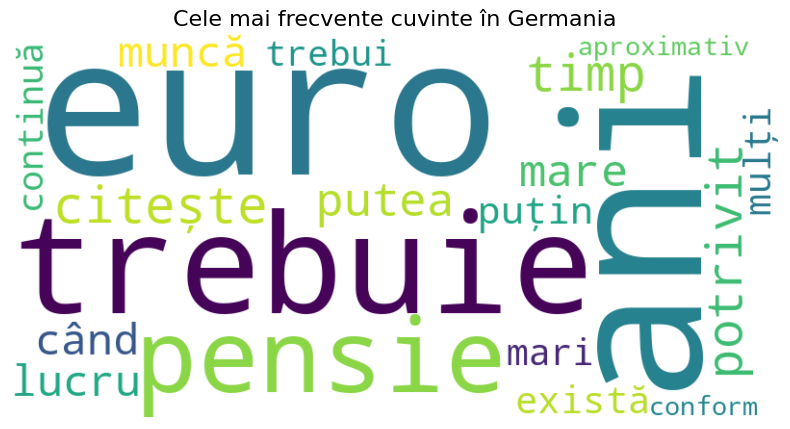

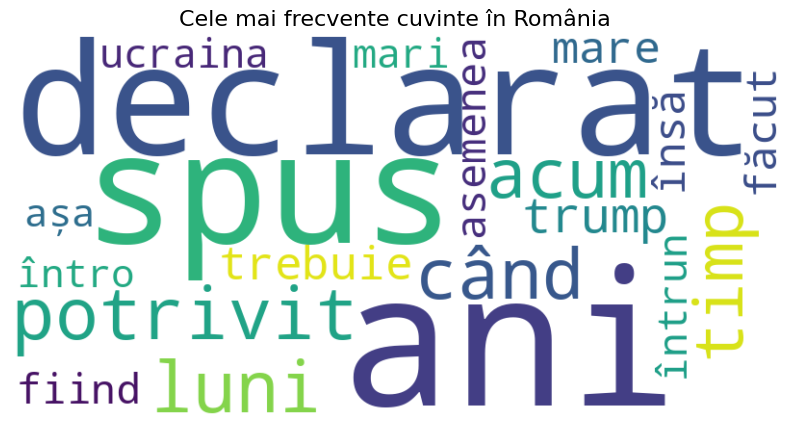

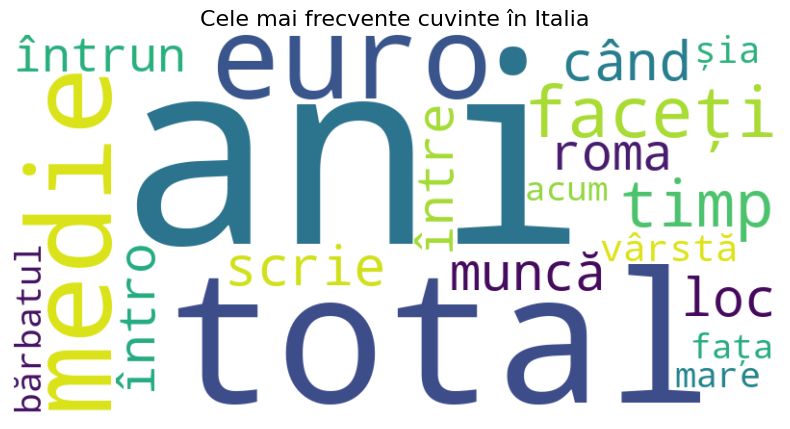

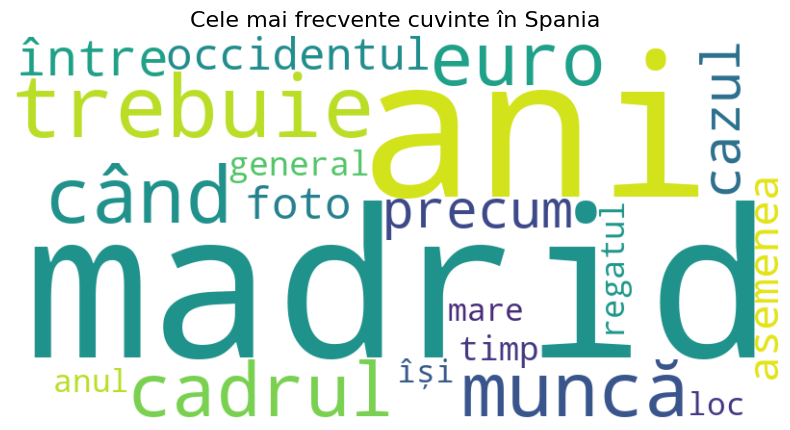

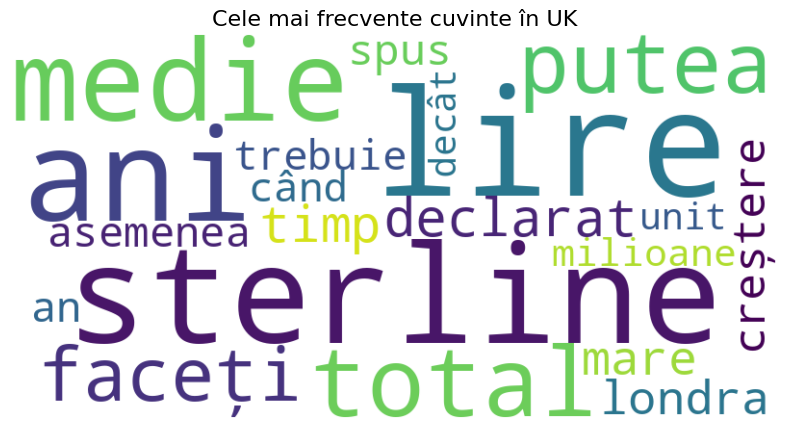

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

germania_word_freq = word_frequencies_by_region(df, 'Germania')
romania_word_freq = word_frequencies_by_region(df, 'Romania')
italia_word_freq = word_frequencies_by_region(df, 'Italia')
spain_word_freq = word_frequencies_by_region(df, 'Spania')
uk_word_freq = word_frequencies_by_region(df, 'UK')

generate_wordcloud(germania_word_freq, "Cele mai frecvente cuvinte în Germania")
generate_wordcloud(romania_word_freq, "Cele mai frecvente cuvinte în România")
generate_wordcloud(italia_word_freq, "Cele mai frecvente cuvinte în Italia")
generate_wordcloud(spain_word_freq, "Cele mai frecvente cuvinte în Spania")
generate_wordcloud(uk_word_freq, "Cele mai frecvente cuvinte în UK")


# **5. Cuvinte caracteristice**

In [8]:
from collections import Counter

def detect_foreign_words(df, region, foreign_words_list):
    region_texts = df[df['region'] == region]['cleaned_text'].sum()
    if not isinstance(region_texts, str):
        return []

    tokens = region_texts.split()
    detected_words = [word for word in tokens if word in foreign_words_list]
    return Counter(detected_words).most_common()


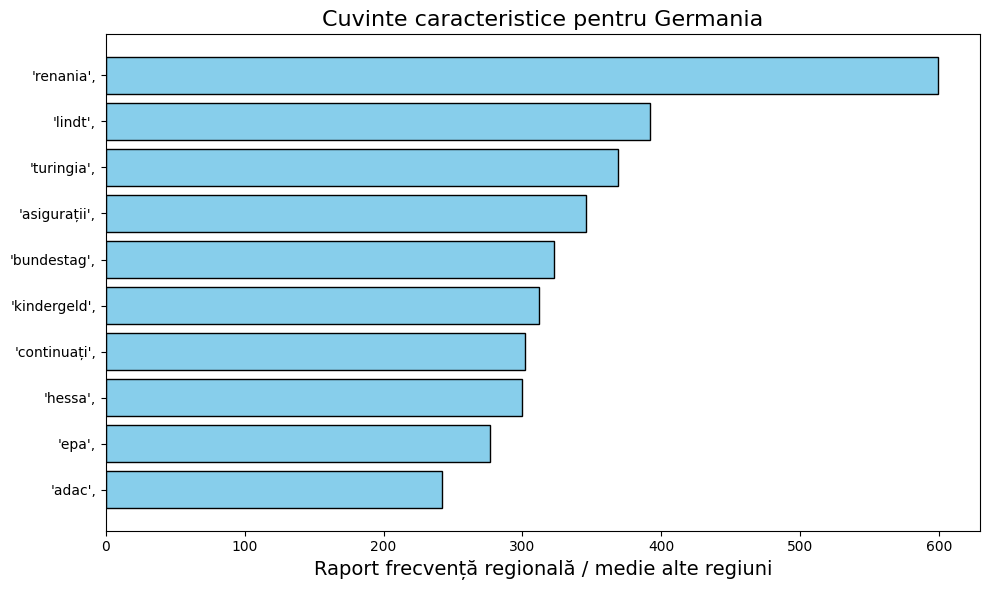

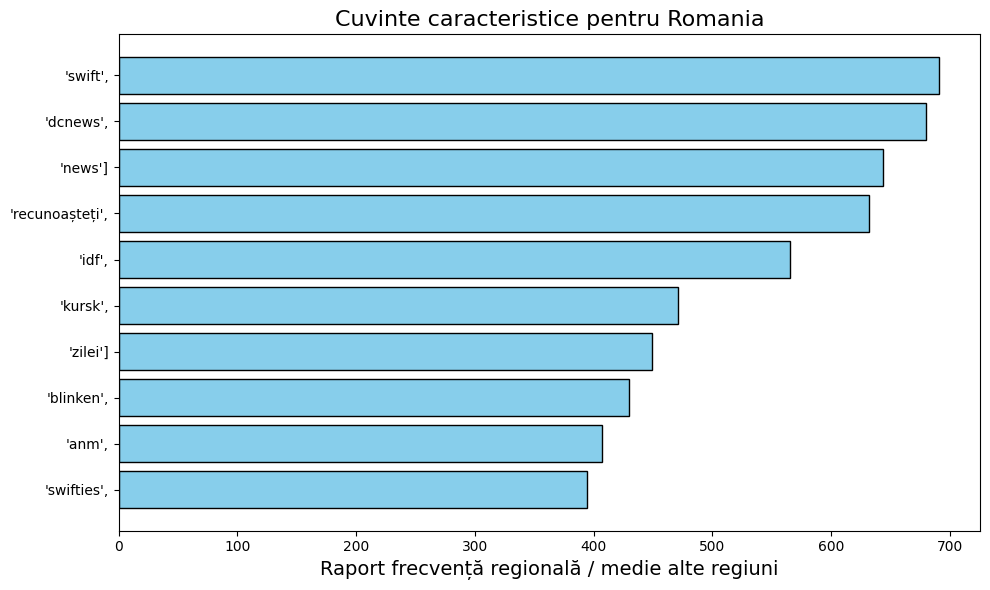

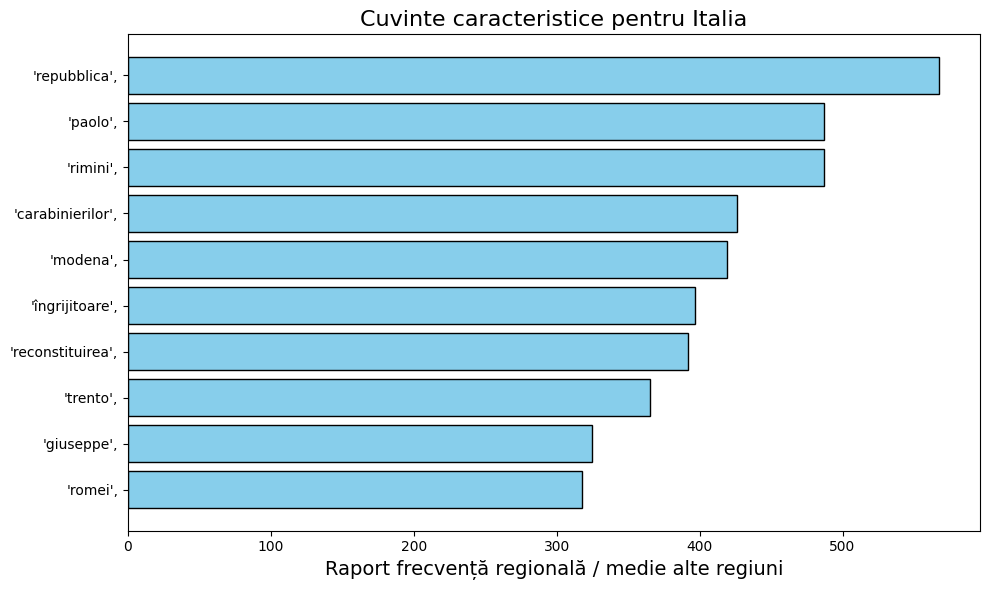

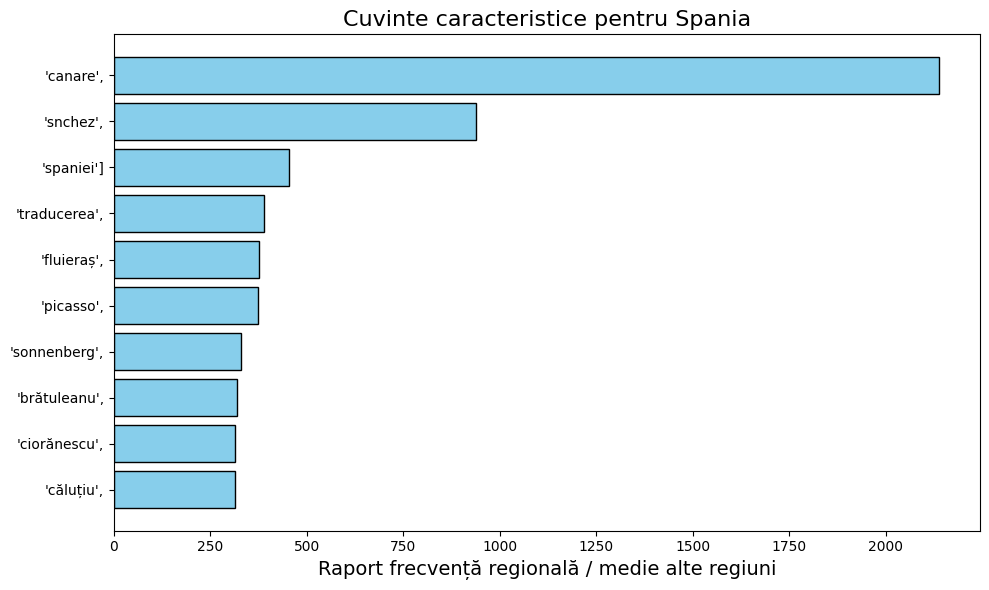

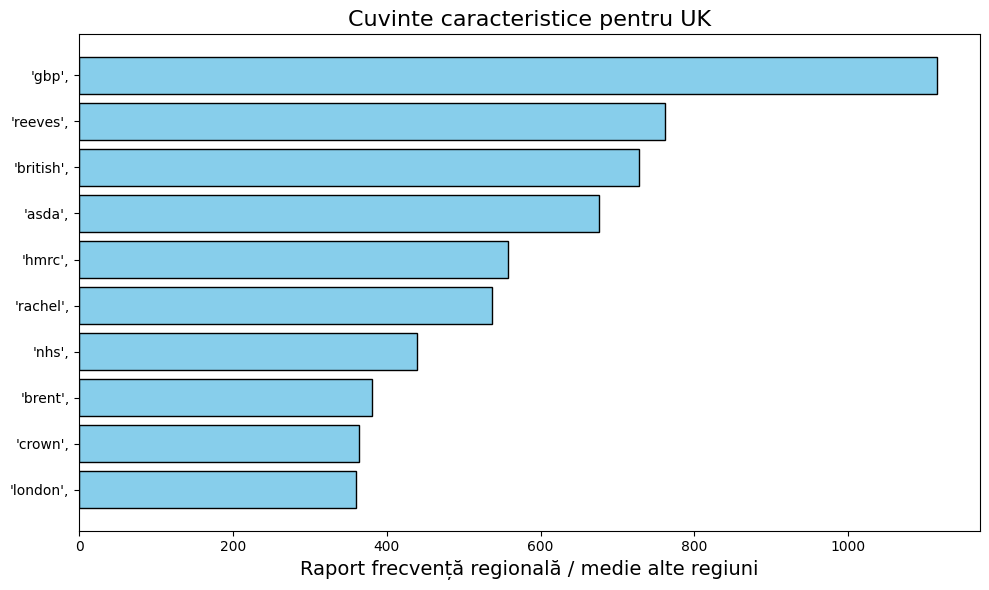

In [9]:
from collections import Counter

def calculate_word_frequencies(df):
    region_word_counts = {}
    for region in df['region'].unique():
        region_text = ' '.join(df[df['region'] == region]['cleaned_text'].astype(str))
        word_counts = Counter(region_text.split())
        total_words = sum(word_counts.values())
        region_word_counts[region] = {word: count / total_words for word, count in word_counts.items()}
    return region_word_counts

def detect_characteristic_words(region_word_counts):
    characteristic_words = {}
    for region, words in region_word_counts.items():
        other_regions = {r: w for r, w in region_word_counts.items() if r != region}
        other_avg_freq = Counter()
        for other_words in other_regions.values():
            other_avg_freq.update(other_words)
        other_avg_freq = {word: freq / len(other_regions) for word, freq in other_avg_freq.items()}

        region_characteristics = {
            word: freq / (other_avg_freq.get(word, 1e-6))
            for word, freq in words.items()
        }
        characteristic_words[region] = {
            word: ratio for word, ratio in sorted(region_characteristics.items(), key=lambda x: x[1], reverse=True) if ratio > 2
        }
    return characteristic_words

def plot_characteristic_words(characteristic_words, region):
    region_words = characteristic_words[region]
    words, ratios = zip(*list(region_words.items())[:10])
    plt.figure(figsize=(10, 6))
    plt.barh(words, ratios, color='skyblue', edgecolor='black')
    plt.title(f"Cuvinte caracteristice pentru {region}", fontsize=16)
    plt.xlabel("Raport frecvență regională / medie alte regiuni", fontsize=14)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

region_word_counts = calculate_word_frequencies(df)
characteristic_words = detect_characteristic_words(region_word_counts)
plot_characteristic_words(characteristic_words, 'Germania')

plot_characteristic_words(characteristic_words, 'Romania')
plot_characteristic_words(characteristic_words, 'Italia')
plot_characteristic_words(characteristic_words, 'Spania')
plot_characteristic_words(characteristic_words, 'UK')


<ipython-input-10-bb0ac344994f>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Ratio'))


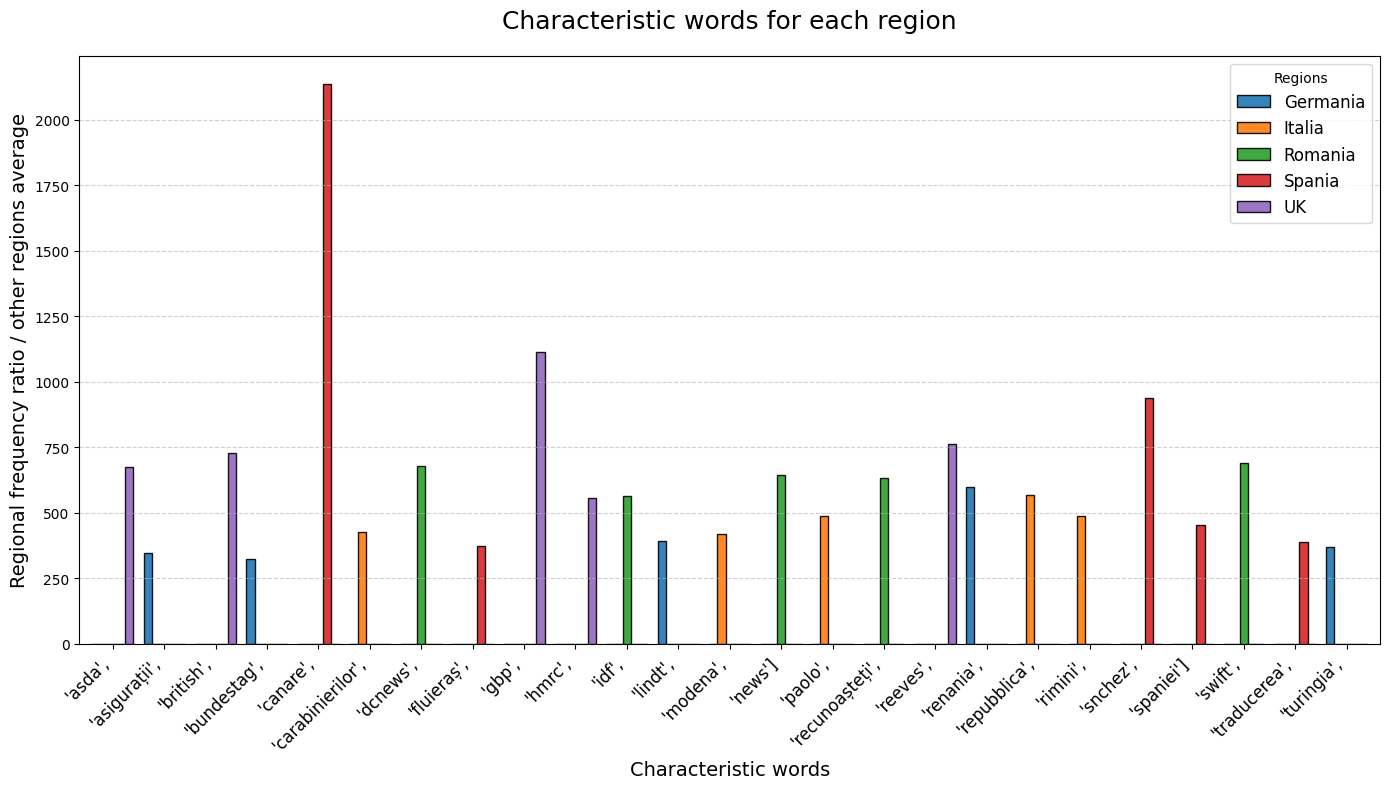

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_all_regions(characteristic_words):
    data = []
    for region, words in characteristic_words.items():
        for word, ratio in words.items():
            data.append({'Region': region, 'Word': word, 'Ratio': ratio})
    df_plot = pd.DataFrame(data)

    top_words = (
        df_plot.groupby('Region')
        .apply(lambda x: x.nlargest(5, 'Ratio'))
        .reset_index(drop=True)
    )

    pivot_data = top_words.pivot(index='Word', columns='Region', values='Ratio').fillna(0)

    pivot_data.plot(kind='bar', figsize=(14, 8), width=0.8, alpha=0.9, edgecolor='black')

    plt.title("Characteristic words for each region", fontsize=18, pad=20)
    plt.xlabel("Characteristic words", fontsize=14)
    plt.ylabel("Regional frequency ratio / other regions average", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(title="Regions", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

region_word_counts = calculate_word_frequencies(df)
characteristic_words = detect_characteristic_words(region_word_counts)
plot_all_regions(characteristic_words)


In [ ]:
common_words = set.intersection(*[set(region.keys()) for region in region_word_counts.values()])

common_word_analysis = {
    word: {region: region_word_counts[region].get(word, 0) for region in region_word_counts}
    for word in common_words
}

for word, freqs in list(common_word_analysis.items())[:10]:
    print(f"{word}: {freqs}")


'deși',: {'Romania': 0.0006413137402112729, 'Germania': 0.0013287408881036864, 'Italia': 0.0007399379322652112, 'Spania': 0.000578552888073471, 'UK': 0.001160034577953766}
'ziarul',: {'Romania': 3.605780065444908e-05, 'Germania': 0.003592796591297118, 'Italia': 4.787833679363131e-05, 'Spania': 0.00015115345724442034, 'UK': 7.807925043919578e-05}
'ore',: {'Romania': 0.000656767083348894, 'Germania': 0.000541888742075805, 'Italia': 0.0008139317254917323, 'Spania': 0.0003700653608397878, 'UK': 0.0004684755026351747}
'tipuri',: {'Romania': 6.181337255048414e-05, 'Germania': 9.650073489021185e-05, 'Italia': 3.917318464933471e-05, 'Spania': 5.733406998926289e-05, 'UK': 8.36563397562812e-05}
'naturii',: {'Romania': 2.575557189603506e-05, 'Germania': 7.42313345309322e-06, 'Italia': 2.6115456432889805e-05, 'Spania': 4.169750544673665e-05, 'UK': 1.1154178634170825e-05}
'ton',: {'Romania': 3.863335784405259e-06, 'Germania': 7.42313345309322e-06, 'Italia': 4.352576072148301e-06, 'Spania': 2.084875

# **6. TF-IDF - Cele mai importante cuvinte**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


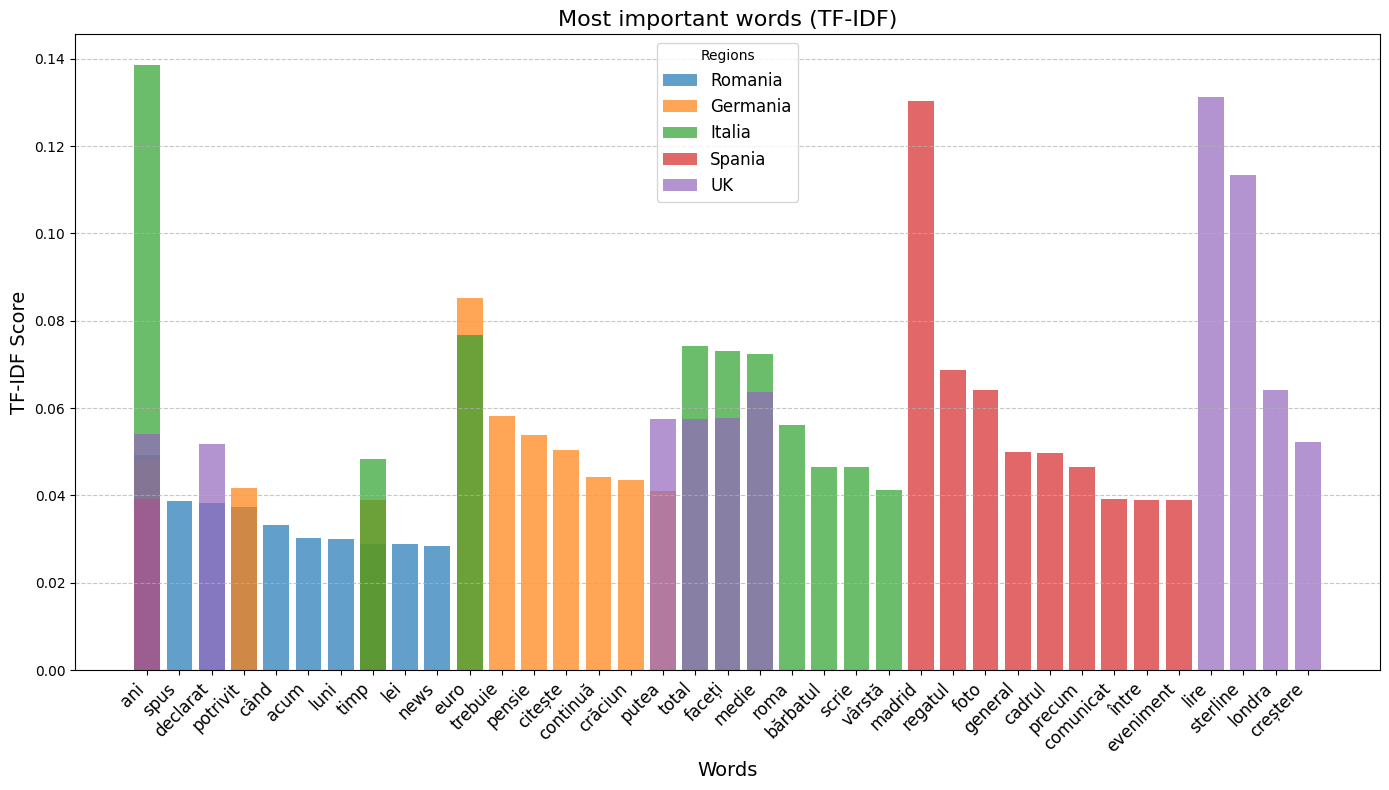

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words('romanian') + ['și', 'sau', 'este', 'fi',"clic", "evalua", "dcnews", "urmariti", "ziar", "postare", "citiți", "urmăriți","marea","britanie","roman","român","româncă","germania","româniei","românesc","românia","români","românești","continuați","ziarul","italia","spania","spaniei"])

def clean_and_remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-ZăîâșțĂÎÂȘȚ ]', '', text)
    text = text.lower().strip()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(clean_and_remove_stopwords)

def calculate_tfidf(df):
    vectorizer = TfidfVectorizer(max_features=500)
    tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    tfidf_df['region'] = df['region'].values
    return tfidf_df

tfidf_df = calculate_tfidf(df)

region_top_words = {}
for region in df['region'].unique():
    region_tfidf = tfidf_df[tfidf_df['region'] == region].drop('region', axis=1).mean().sort_values(ascending=False)
    region_top_words[region] = region_tfidf.head(10)

def plot_top_tfidf_words(region_top_words):
    plt.figure(figsize=(14, 8))
    for region, words in region_top_words.items():
        plt.bar(
            words.index,
            words.values,
            label=region,
            alpha=0.7
        )

    plt.title("Most important words (TF-IDF)", fontsize=16)
    plt.xlabel("Words", fontsize=14)
    plt.ylabel("TF-IDF Score", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(title="Regions", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_top_tfidf_words(region_top_words)


# 7. **Spacy** Dependencies install

In [ ]:
!pip install spacy
!pip install spacy-lookups-data

!python -m spacy download ro_core_news_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 25.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ro_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# **8. Imprumuturi Lexicale**

In [ ]:
import pandas as pd
import glob

file_paths = glob.glob('/content/*.json')
dfs = []

for file_path in file_paths:
    df = pd.read_json(file_path)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

print(df.head())

assert 'text' in df.columns, "Coloana 'text' lipsește din dataset!"
assert 'region' in df.columns, "Coloana 'region' lipsește din dataset!"


                                               title  \
0  Iluzia optică ce îţi testează inteligenţa | Gă...   
1  Crăciun „ecuatorial”! Record de căldură în Rom...   
2  Accident teribil în sectorul 6 din București. ...   
3  Marcel Ciolacu: Propuneri toxice privind auton...   
4  Ce au consumat fetele din Lupeni, înainte să s...   

                                                text   region  \
0  Este miercuri, suntem la mijlocul săptămânii ș...  Romania   
1  La fel ca și anul trecut, bucureștenii au avut...  Romania   
2  Accident grav petrecut în București, în sector...  Romania   
3  Prim-ministrul Marcel Ciolacu a transmis, prin...  Romania   
4  Ies la iveală noi detalii în cazul tragediei d...  Romania   

                 date category         url author  
0  20/12/2023 | 09:00    Stiri  cancan.txt    NaN  
1  25/12/2023 | 23:19    Stiri  cancan.txt    NaN  
2  02/01/2024 | 13:55    Stiri  cancan.txt    NaN  
3  20/12/2023 | 22:27    Stiri  cancan.txt    NaN  
4  12/01/202

In [ ]:
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('romanian') + stopwords.words('english'))
stop_words.update(["și", "sau", "este", "în", "la", "cu", "ani","marea" , "britanie", "germania", "roman", "italia", "spania", "cititi", "continuati", "madrid", "spania", "putea", "romaniei", "spaniei"])

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-ZăîâșțĂÎÂȘȚ ]', '', text)
    text = text.lower().strip()
    return text

def preprocess_text(text, stop_words):
    if not isinstance(text, str):
        return []
    text = clean_text(text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df['cleaned_text'] = df['text'].apply(lambda x: preprocess_text(x, stop_words))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

nlp = spacy.load('ro_core_news_sm')

def analyze_lexical_influence(df, nlp):
    regional_words = Counter()

    texts = [' '.join(tokens) for tokens in df['cleaned_text']]
    regions = df['region'].tolist()
    docs = nlp.pipe(texts, batch_size=50)

    for doc, region in zip(docs, regions):
        for token in doc:
            if token.is_alpha:
                regional_words[(region, token.text.lower())] += 1

    return regional_words

def analyze_pos_distribution(df, nlp):
    pos_counts = {region: Counter() for region in df['region'].unique()}

    texts = [' '.join(tokens) for tokens in df['cleaned_text']]
    regions = df['region'].tolist()
    docs = nlp.pipe(texts, batch_size=50)

    for doc, region in zip(docs, regions):
        pos_counts[region].update([token.pos_ for token in doc])

    return pos_counts

def analyze_named_entities(df, nlp):
    entity_counts = {region: Counter() for region in df['region'].unique()}

    texts = [' '.join(tokens) for tokens in df['cleaned_text']]
    regions = df['region'].tolist()
    docs = nlp.pipe(texts, batch_size=50)

    for doc, region in zip(docs, regions):
        entity_counts[region].update([ent.label_ for ent in doc.ents])

    return entity_counts

lexical_influence = analyze_lexical_influence(df, nlp)
pos_distribution = analyze_pos_distribution(df, nlp)
entity_distribution = analyze_named_entities(df, nlp)


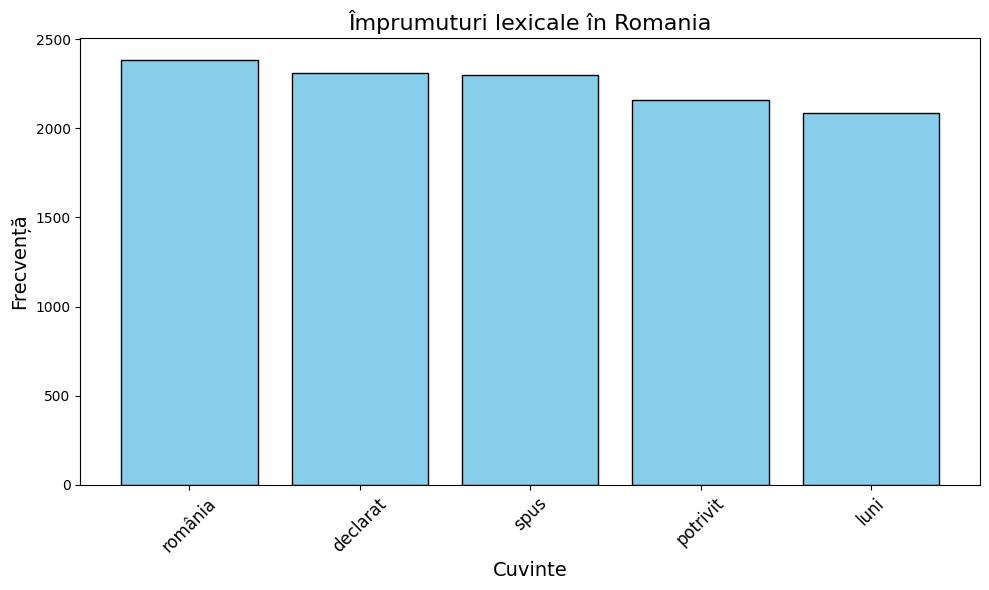

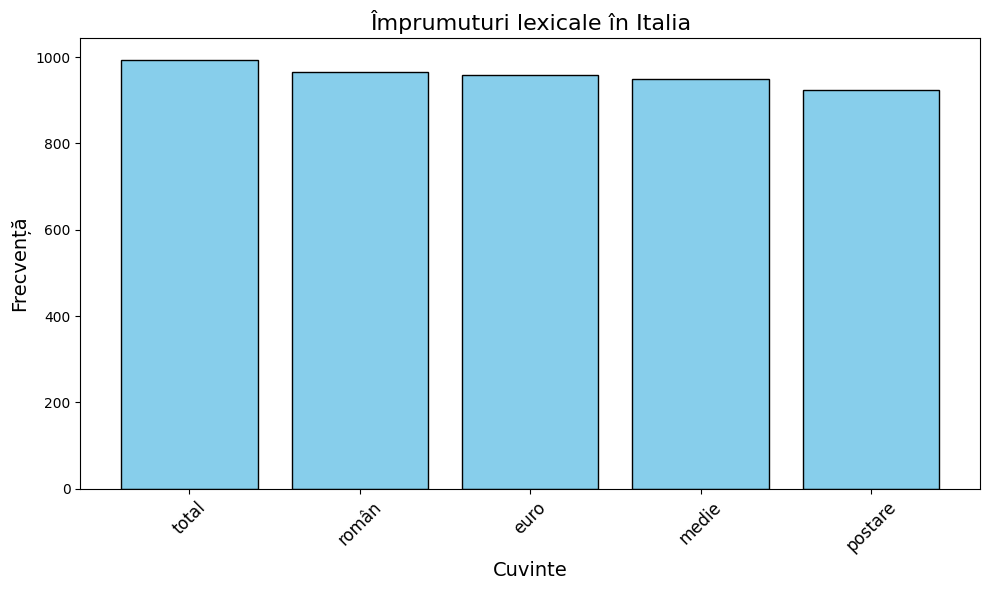

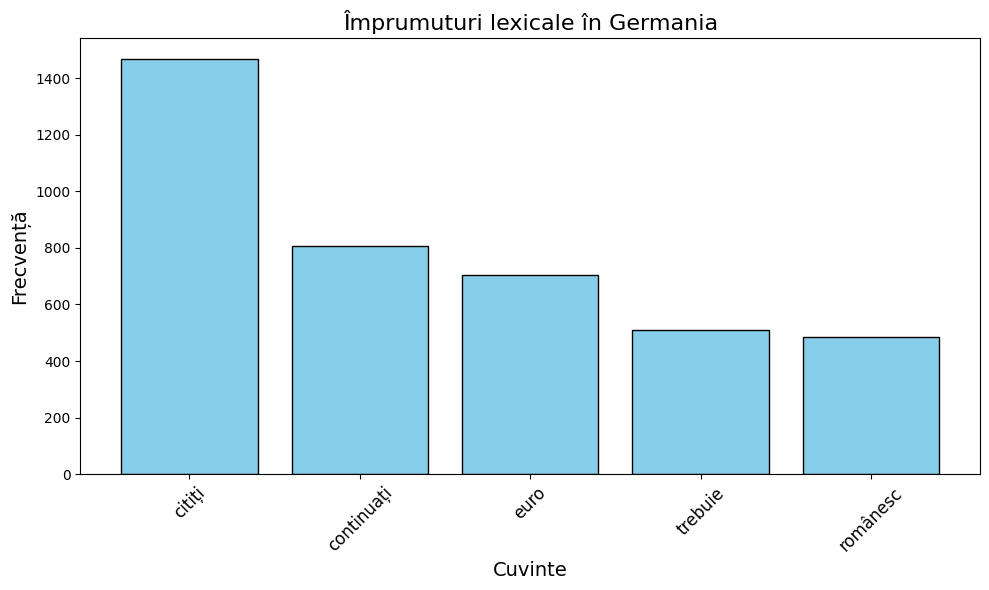

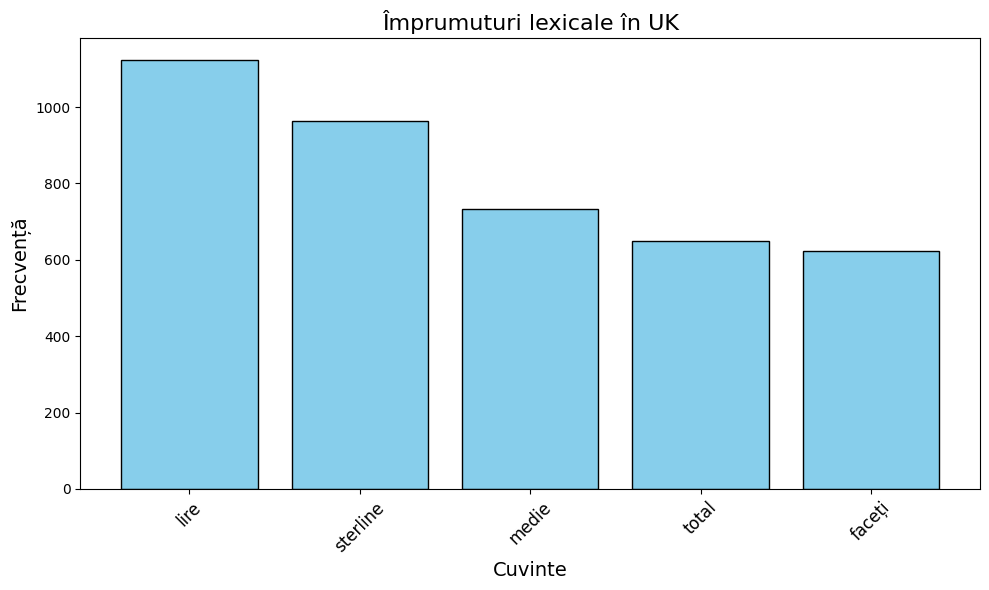

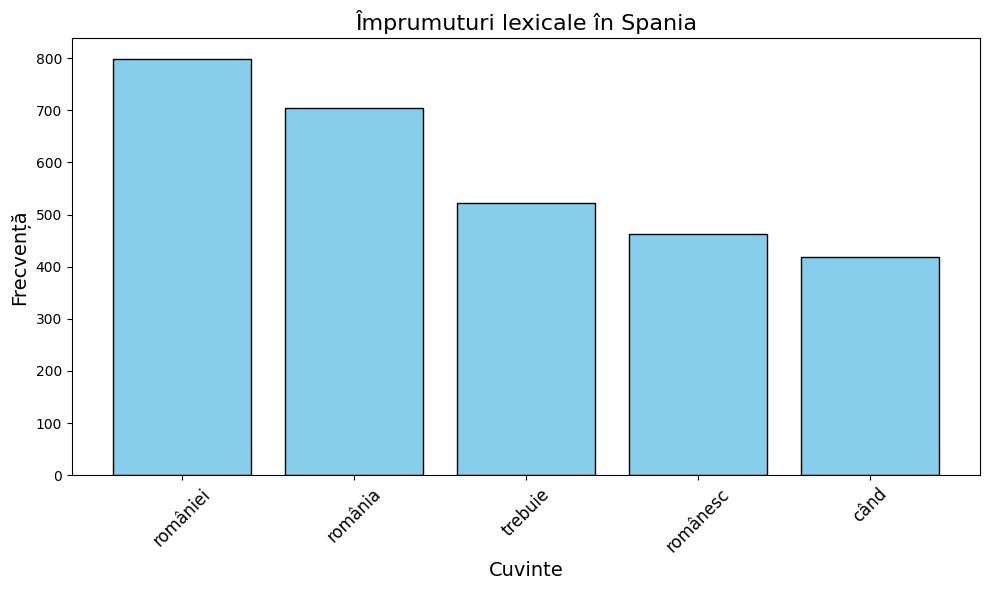

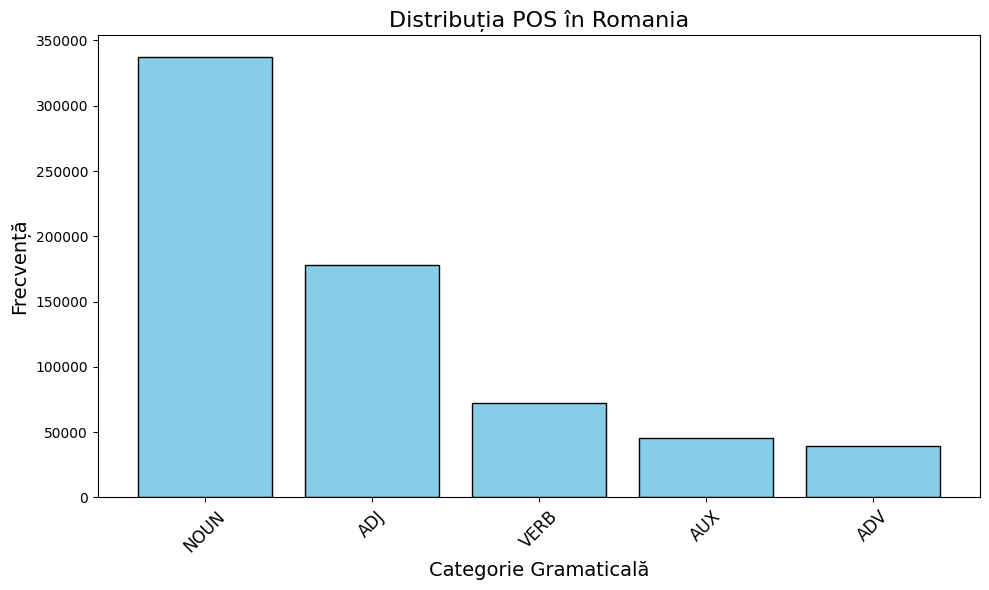

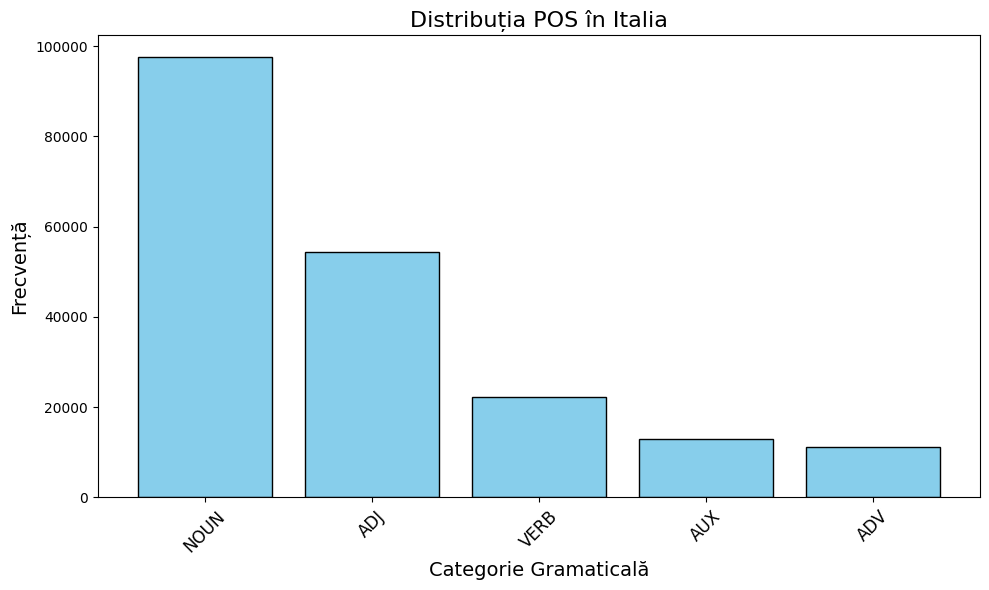

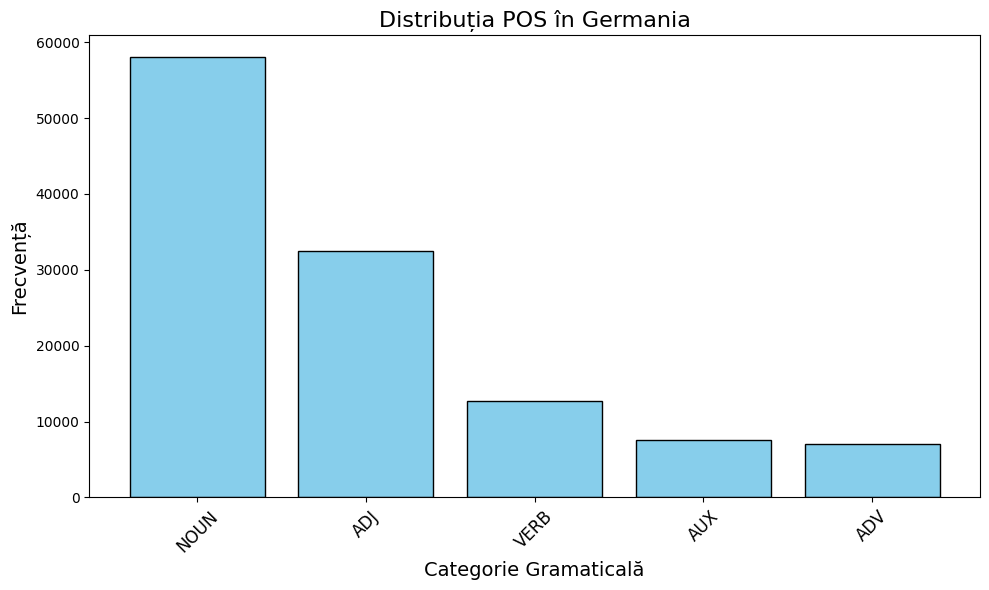

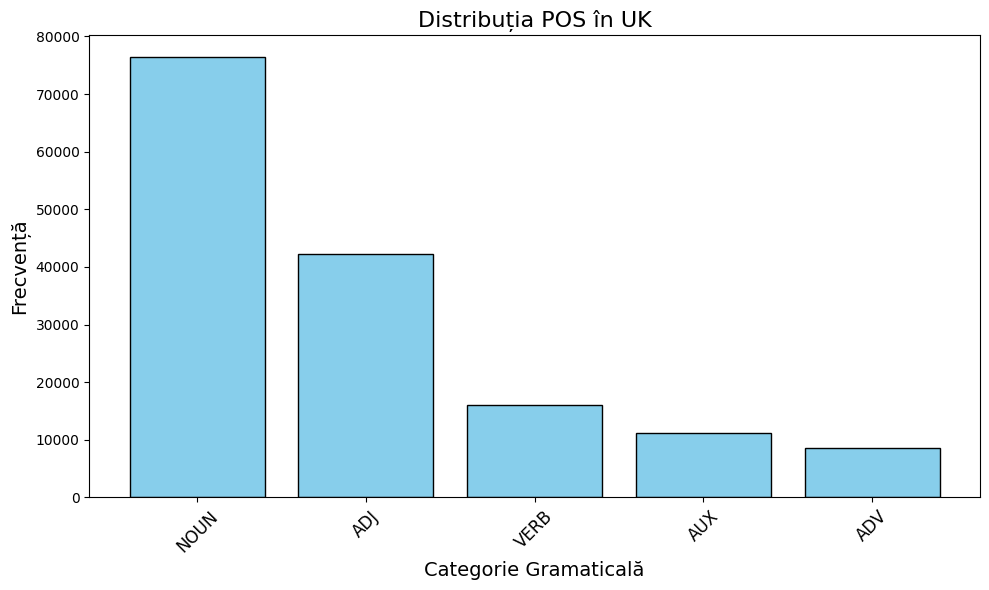

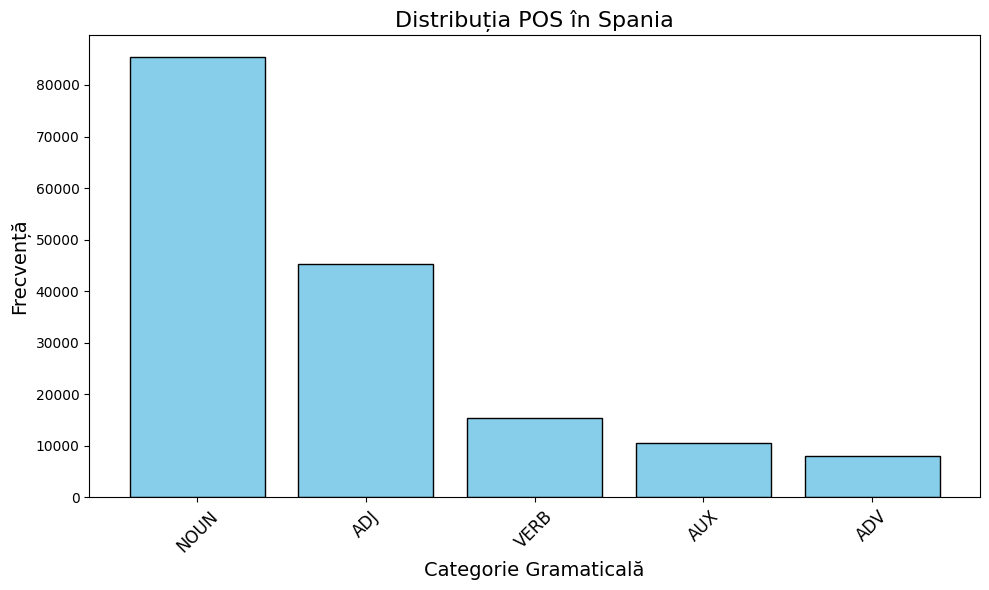

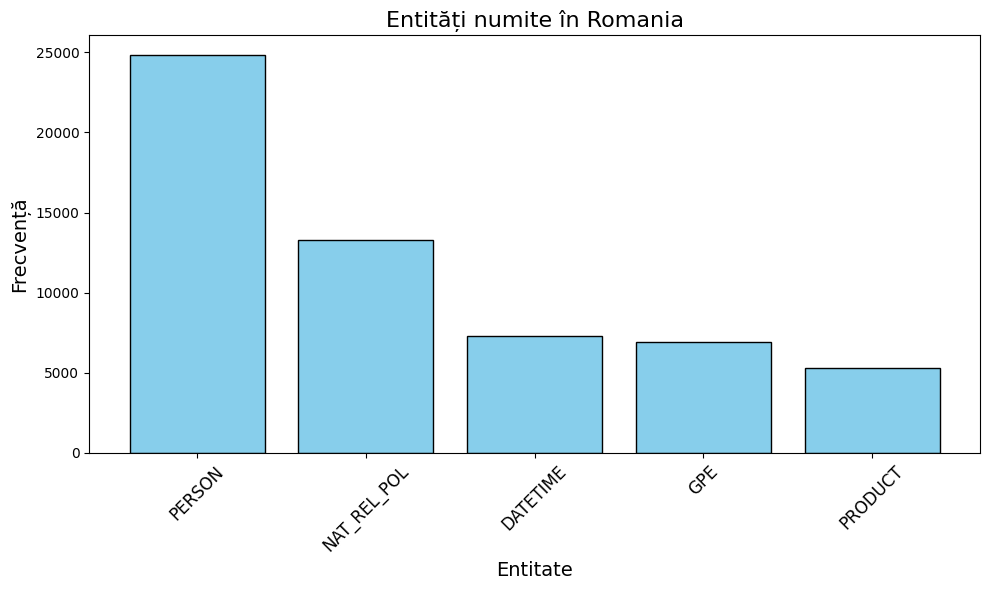

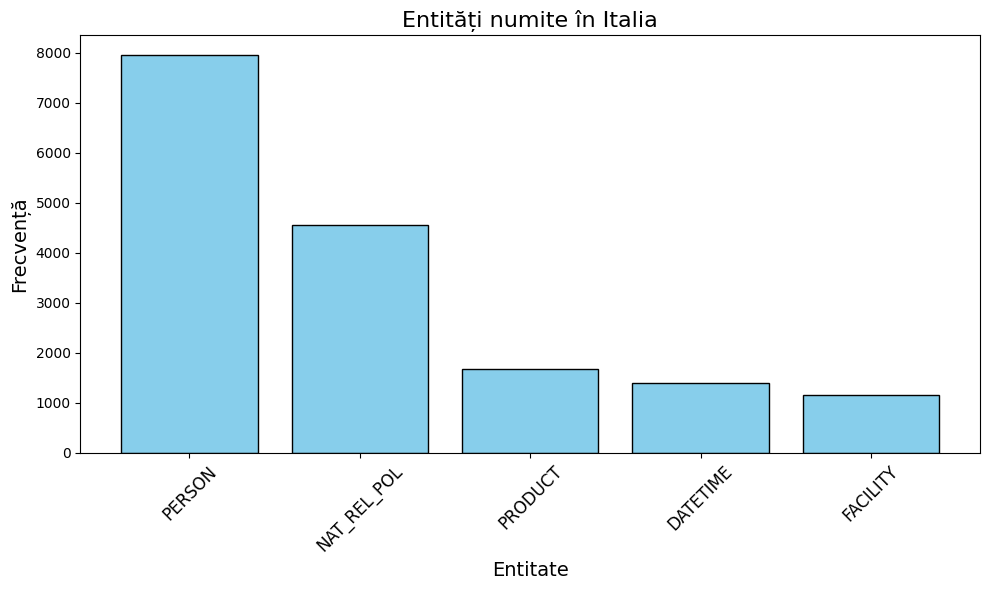

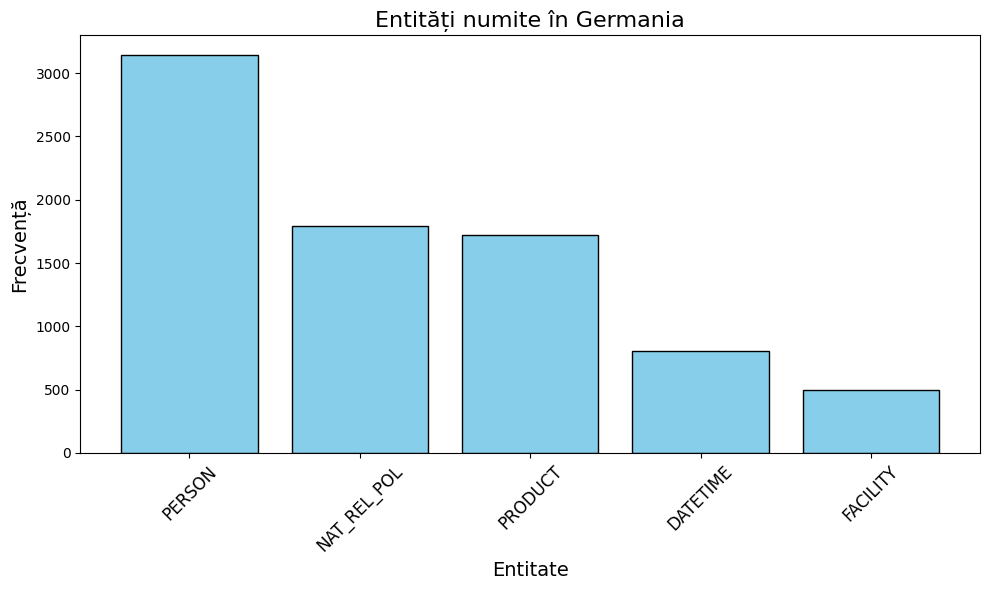

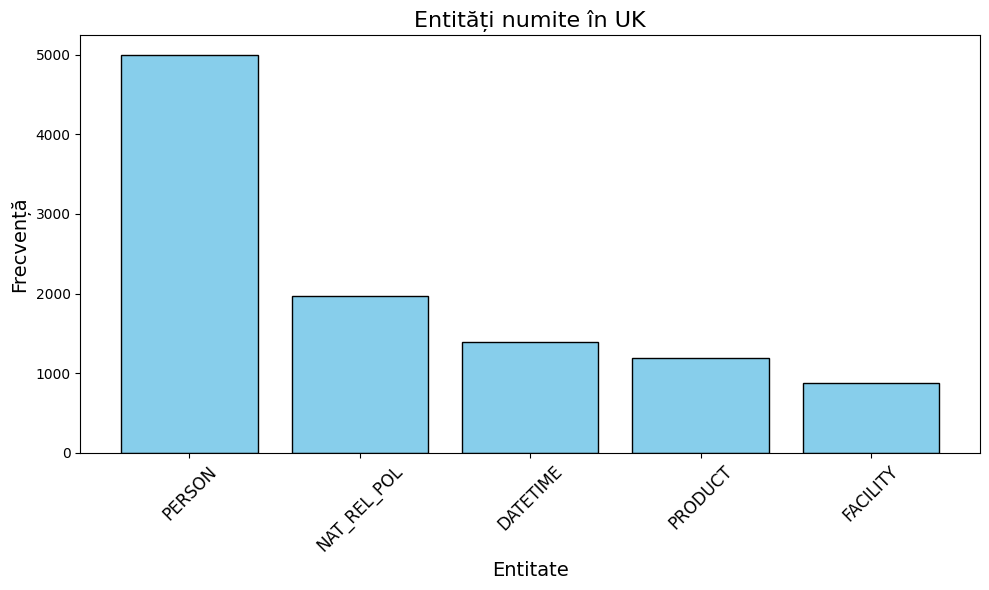

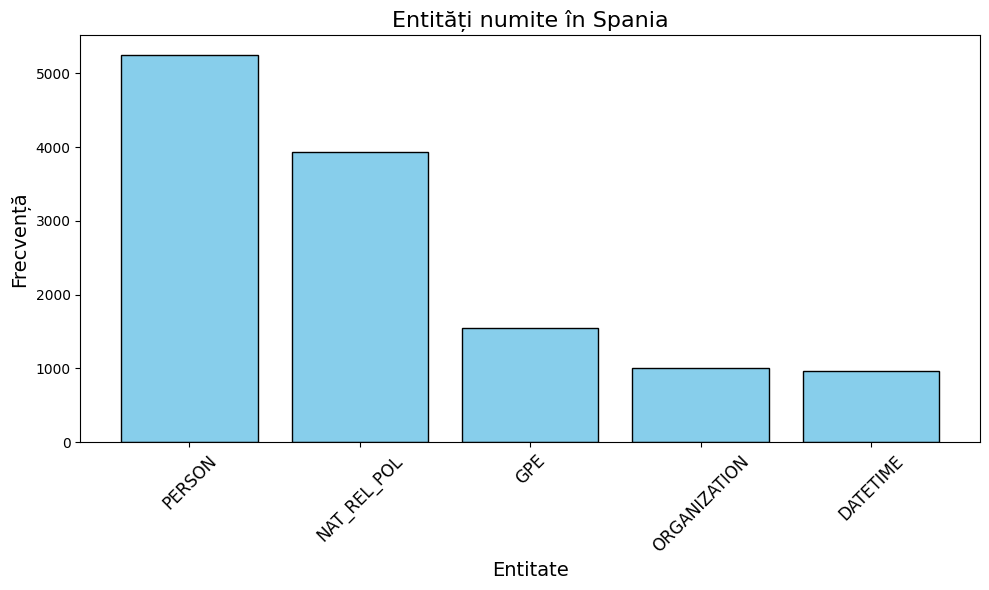

In [ ]:
def plot_distribution(distribution, title, xlabel, ylabel):
    for region, counts in distribution.items():
        top_items = counts.most_common(5)
        if not top_items:
            continue
        labels, values = zip(*top_items)
        plt.figure(figsize=(10, 6))
        plt.bar(labels, values, color='skyblue', edgecolor='black')
        plt.title(f"{title} în {region}", fontsize=16)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.tight_layout()
        plt.show()

plot_distribution(
    {region: Counter({word: count for (region_, word), count in lexical_influence.items() if region_ == region})
     for region in df['region'].unique()},
    "Împrumuturi lexicale",
    "Cuvinte",
    "Frecvență"
)

plot_distribution(pos_distribution, "Distribuția POS", "Categorie Gramaticală", "Frecvență")
plot_distribution(entity_distribution, "Entități numite", "Entitate", "Frecvență")


# **9. Bigrame si Trigrame**

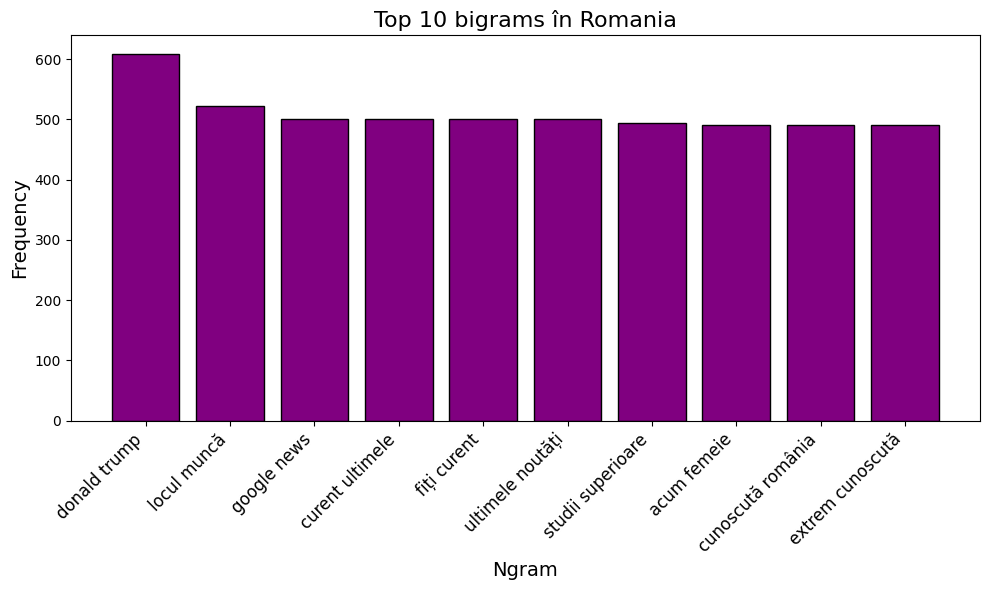

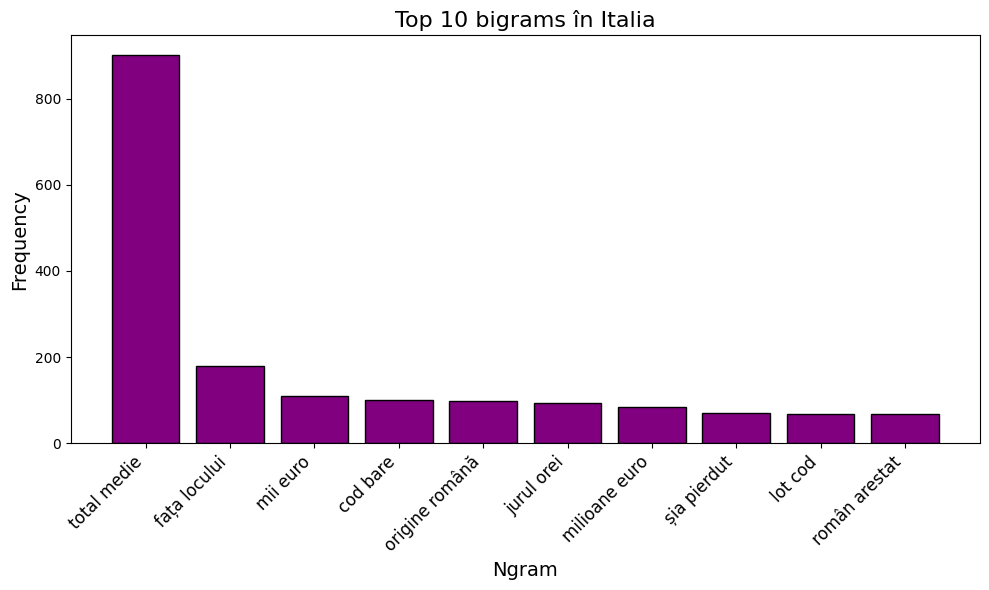

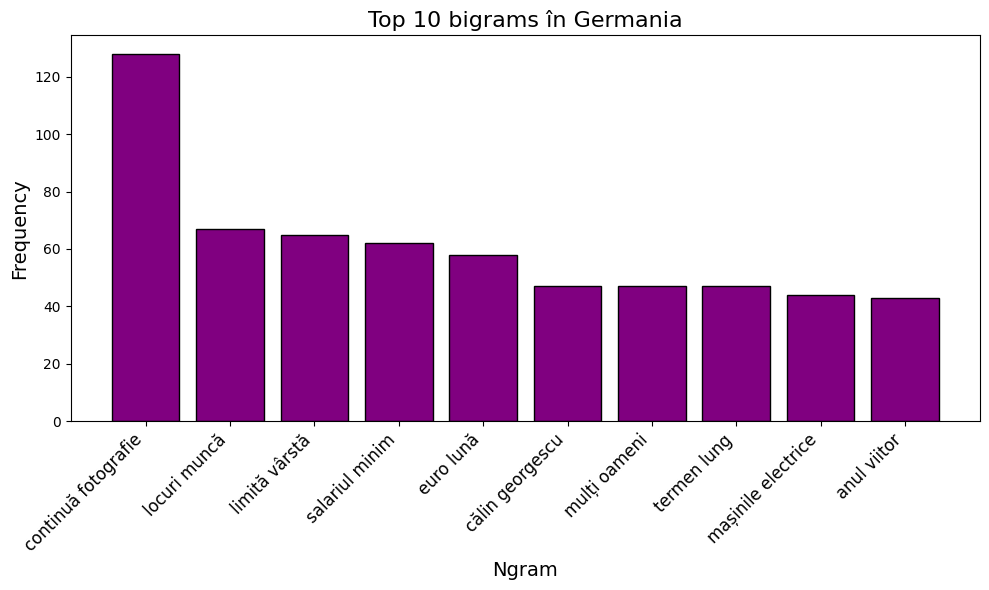

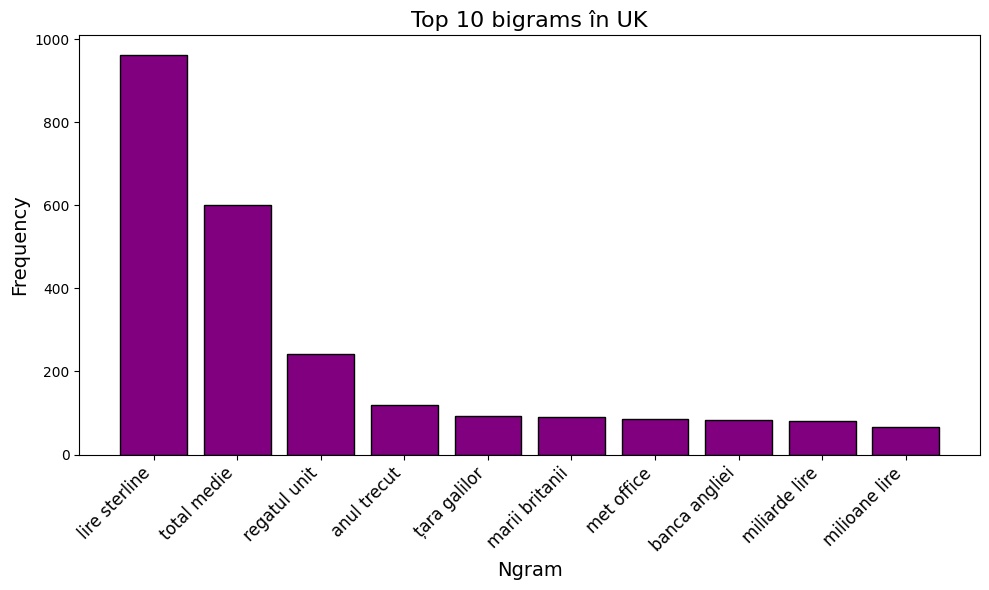

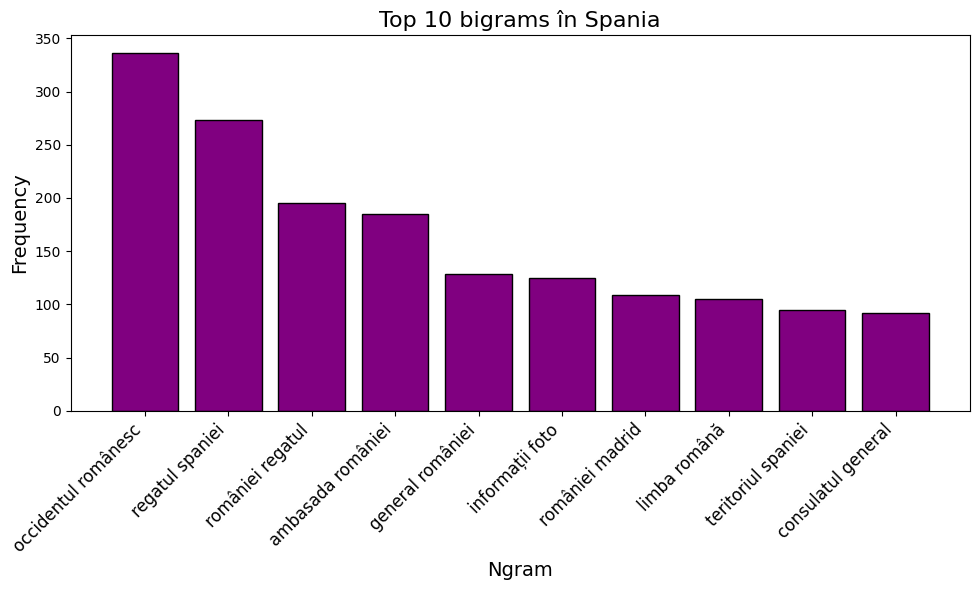

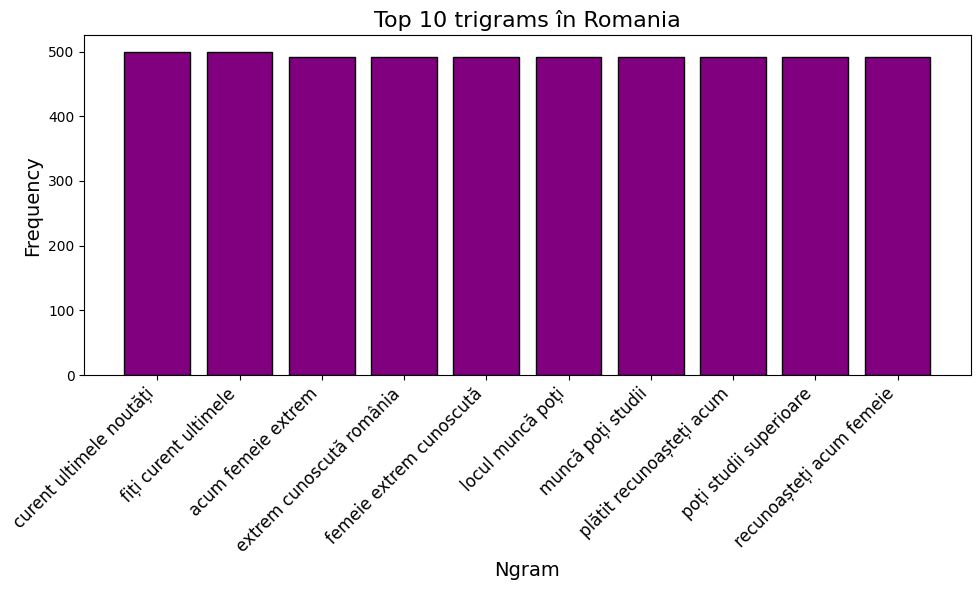

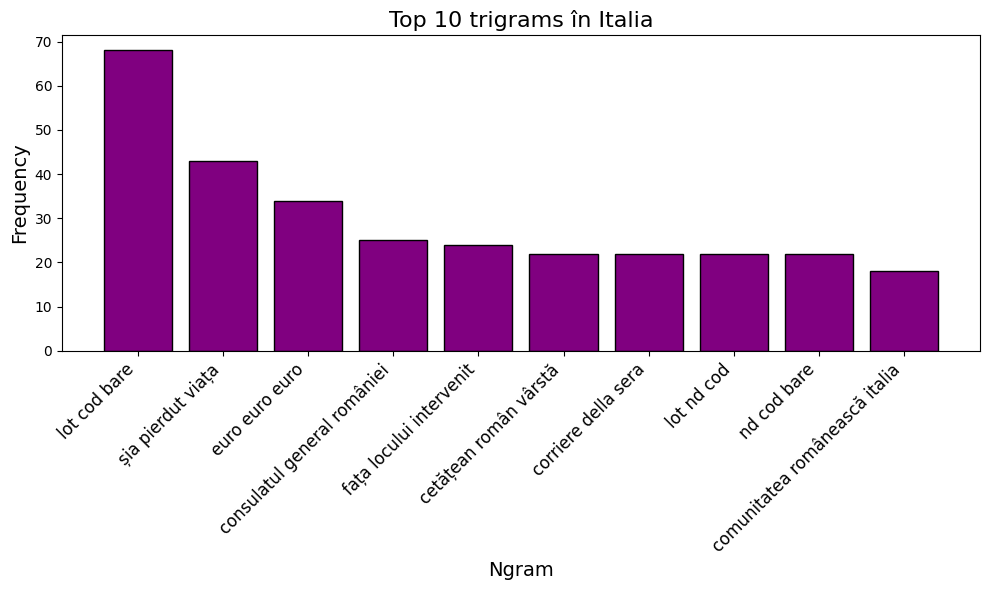

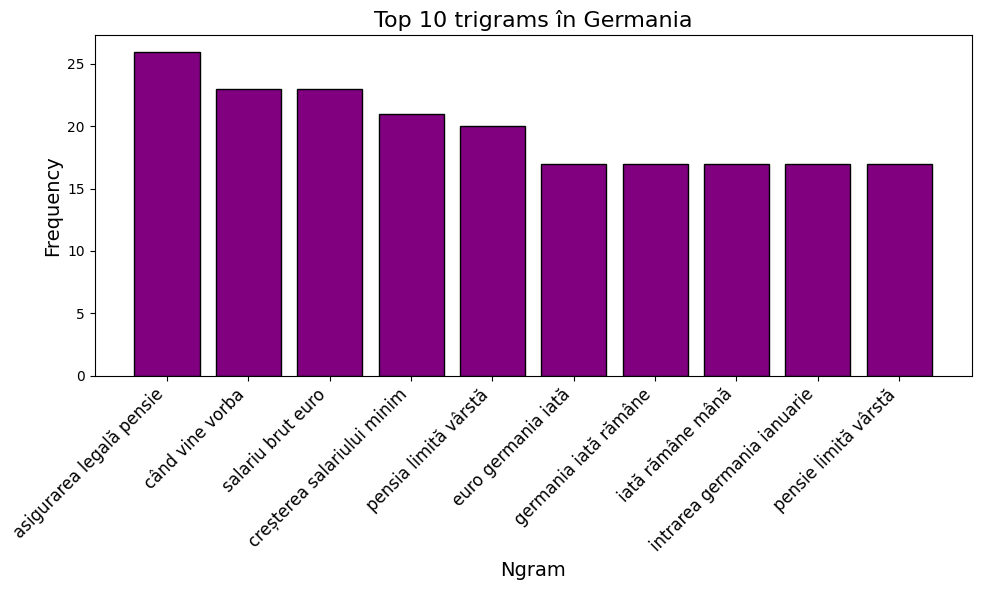

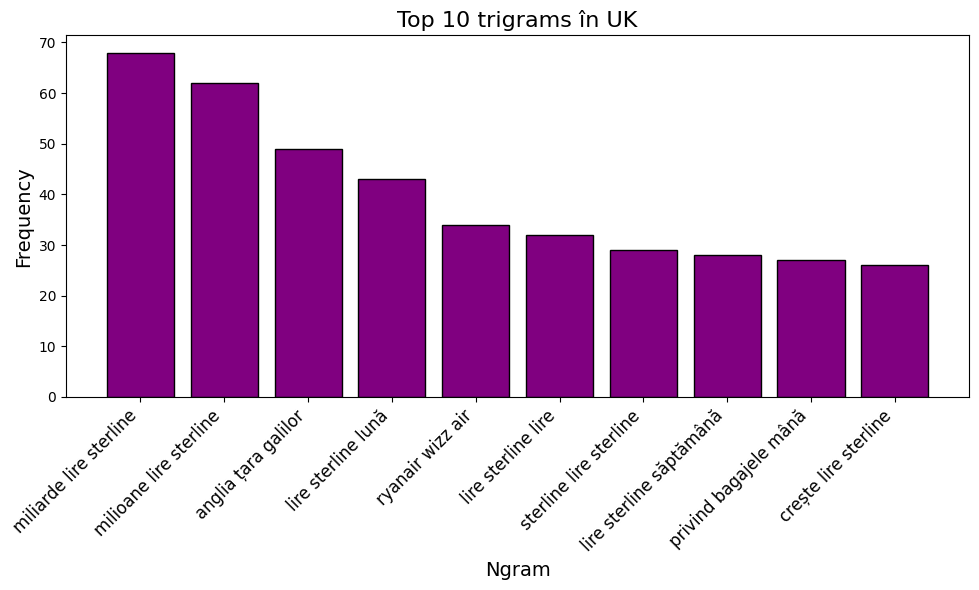

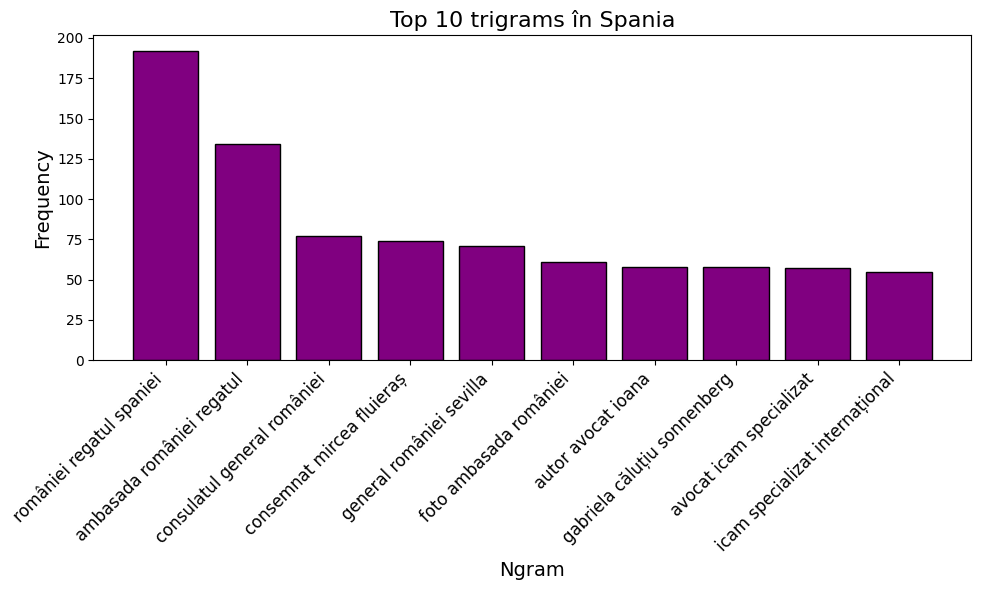

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

excluded_words = {"clic", "evalua", "dcnews", "urmariti", "ziar", "postare", "citiți", "urmăriți"}


def analyze_ngrams_with_exclusions(df, region, n=2, top_k=10, excluded_words=None):
    if excluded_words is None:
        excluded_words = set()

    region_texts = df[df['region'] == region]['cleaned_text'].apply(lambda x: ' '.join(x)).tolist()
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words=None)

    ngram_matrix = vectorizer.fit_transform(region_texts)
    ngram_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), ngram_matrix.sum(axis=0).A1)))

    filtered_ngrams = {
        ngram: count for ngram, count in ngram_counts.items()
        if not any(excluded_word in ngram for excluded_word in excluded_words)
    }

    top_ngrams = Counter(filtered_ngrams).most_common(top_k)

    if top_ngrams:
        labels, values = zip(*top_ngrams)
        plt.figure(figsize=(10, 6))
        plt.bar(labels, values, color='purple', edgecolor='black')
        plt.title(f"Top {top_k} {'bigrams' if n == 2 else 'trigrams'} în {region}", fontsize=16)
        plt.xlabel("Ngram", fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.tight_layout()
        plt.show()

    return top_ngrams


for region in df['region'].unique():
    analyze_ngrams_with_exclusions(df, region, n=2, top_k=10,excluded_words=excluded_words)

for region in df['region'].unique():
    analyze_ngrams_with_exclusions(df, region, n=3, top_k=10,excluded_words=excluded_words)

# **10. Lungime medie**

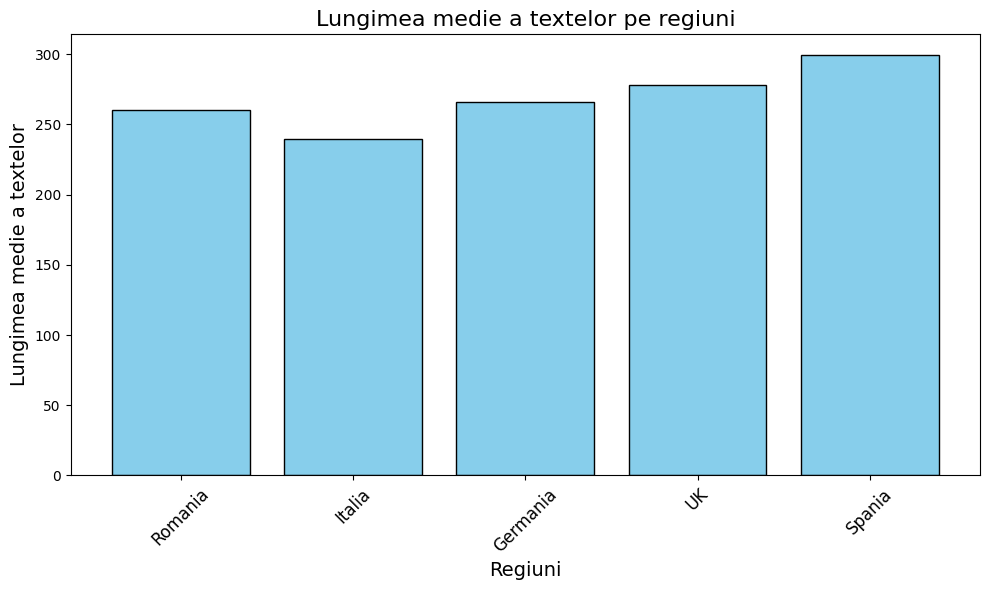

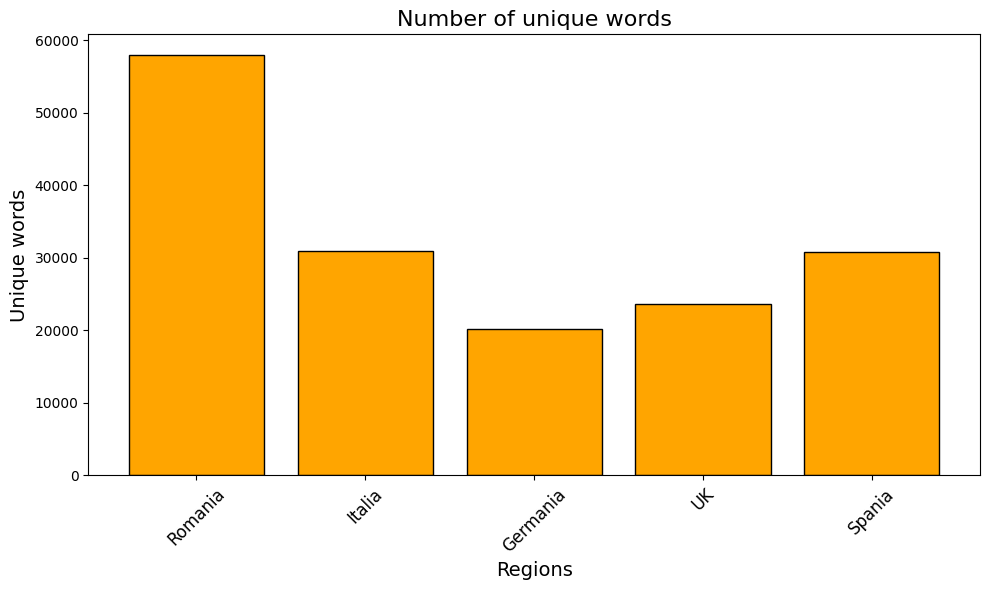

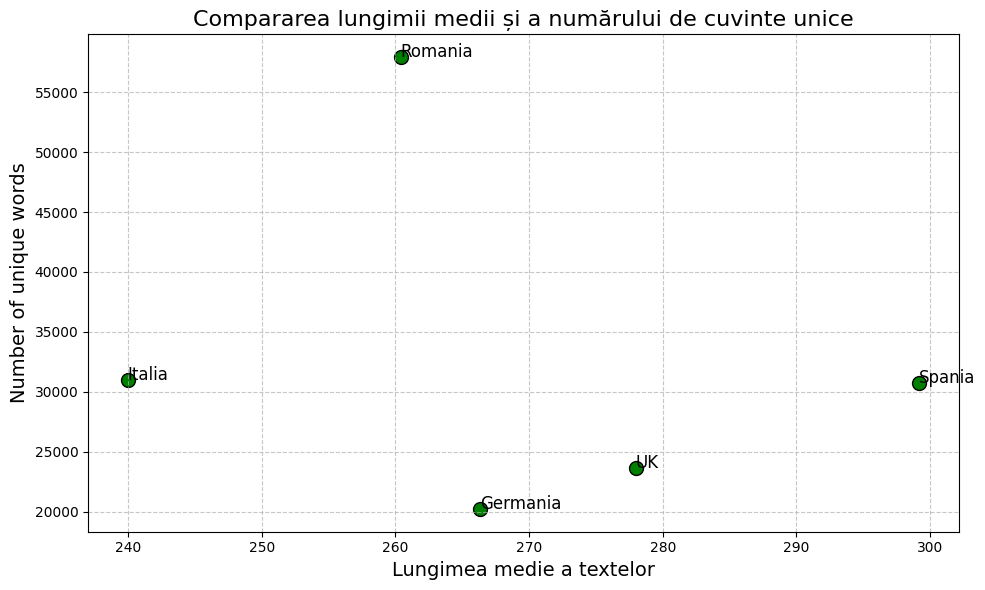

In [ ]:
import matplotlib.pyplot as plt

def analyze_text_complexity(df):
    complexity_data = {}

    for region in df['region'].unique():
        region_texts = df[df['region'] == region]['cleaned_text']
        avg_length = region_texts.apply(len).mean()
        unique_words = len(set(word for text in region_texts for word in text))
        complexity_data[region] = {"avg_length": avg_length, "unique_words": unique_words}

    return complexity_data

text_complexity = analyze_text_complexity(df)

import pandas as pd
complexity_df = pd.DataFrame.from_dict(text_complexity, orient='index')
complexity_df.reset_index(inplace=True)
complexity_df.columns = ['Region', 'Avg_Length', 'Unique_Words']

def plot_avg_length(complexity_df):
    plt.figure(figsize=(10, 6))
    plt.bar(complexity_df['Region'], complexity_df['Avg_Length'], color='skyblue', edgecolor='black')
    plt.title("Lungimea medie a textelor pe regiuni", fontsize=16)
    plt.xlabel("Regiuni", fontsize=14)
    plt.ylabel("Lungimea medie a textelor", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_unique_words(complexity_df):
    plt.figure(figsize=(10, 6))
    plt.bar(complexity_df['Region'], complexity_df['Unique_Words'], color='orange', edgecolor='black')
    plt.title("Number of unique words", fontsize=16)
    plt.xlabel("Regions", fontsize=14)
    plt.ylabel("Unique words", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_complexity_scatter(complexity_df):
    plt.figure(figsize=(10, 6))
    plt.scatter(complexity_df['Avg_Length'], complexity_df['Unique_Words'], color='green', edgecolor='black', s=100)
    for i, region in enumerate(complexity_df['Region']):
        plt.text(complexity_df['Avg_Length'][i], complexity_df['Unique_Words'][i], region, fontsize=12)
    plt.title("Compararea lungimii medii și a numărului de cuvinte unice", fontsize=16)
    plt.xlabel("Lungimea medie a textelor", fontsize=14)
    plt.ylabel("Number of unique words", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_avg_length(complexity_df)
plot_unique_words(complexity_df)
plot_complexity_scatter(complexity_df)
